# k-Fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.https://machinelearningmastery.com/k-fold-cross-validation/

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly;
2. Split the dataset into k groups;
 - For each unique group:
 - Take the group as a hold out or test data set
 - Take the remaining groups as a training data set
 - Fit a model on the training set and evaluate it on the test set
3. Retain the evaluation score and discard the model;
4. Summarize the skill of the model using the sample of model evaluation;


Three common tactics for choosing a value for k are as follows:

  1. Representative: The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.
  2. k=10: The value for k is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias a modest variance.
      - There is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.
  3. k=n: The value for k is fixed to n, where n is the size of the dataset to give each test sample an opportunity to be used in the hold out dataset. This approach is called leave-one-out cross-validation.

we can create an instance that splits a dataset into 3 folds, shuffles prior to the split 'True', and uses a value of 1 for the pseudorandom number generator.

- kfold = KFold(3, True, 1)

The commonly used variations are as follows:

1. Train/Test Split: Taken to one extreme, k may be set to 2 (not 1) such that a single train/test split is created to evaluate the model.
2. LOOCV: Taken to another extreme, k may be set to the total number of observations in the dataset such that each observation is given a chance to be the held out of the dataset. This is called leave-one-out cross-validation, or LOOCV for short.
3. Stratified: The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.
4. Repeated: This is where the k-fold cross-validation procedure is repeated n times, where importantly, the data sample is shuffled prior to each repetition, which results in a different split of the sample.https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
5. Nested: This is where k-fold cross-validation is performed within each fold of cross-validation, often to perform hyperparameter tuning during model evaluation. This is called nested cross-validation or double cross-validation.

In [1]:
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


The make_classification() function can be used to create a synthetic binary classification dataset. We will configure it to generate 100 samples each with 20 input features, 15 of which contribute to the target variable.

In [6]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(100, 20) (100,)


In [17]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.850 (0.128)


Ideal: 0.840
> folds=2, accuracy=0.740 (0.700,0.780)
> folds=3, accuracy=0.749 (0.697,0.824)
> folds=4, accuracy=0.790 (0.640,0.920)
> folds=5, accuracy=0.810 (0.600,0.950)
> folds=6, accuracy=0.820 (0.688,0.941)
> folds=7, accuracy=0.799 (0.571,1.000)
> folds=8, accuracy=0.811 (0.385,0.923)
> folds=9, accuracy=0.829 (0.636,1.000)
> folds=10, accuracy=0.850 (0.600,1.000)
> folds=11, accuracy=0.829 (0.667,1.000)
> folds=12, accuracy=0.785 (0.250,1.000)
> folds=13, accuracy=0.839 (0.571,1.000)
> folds=14, accuracy=0.807 (0.429,1.000)
> folds=15, accuracy=0.821 (0.571,1.000)
> folds=16, accuracy=0.827 (0.500,1.000)
> folds=17, accuracy=0.816 (0.600,1.000)
> folds=18, accuracy=0.831 (0.600,1.000)
> folds=19, accuracy=0.826 (0.600,1.000)
> folds=20, accuracy=0.830 (0.600,1.000)
> folds=21, accuracy=0.814 (0.500,1.000)
> folds=22, accuracy=0.820 (0.500,1.000)
> folds=23, accuracy=0.802 (0.250,1.000)
> folds=24, accuracy=0.804 (0.250,1.000)
> folds=25, accuracy=0.810 (0.250,1.000)
> folds=26,

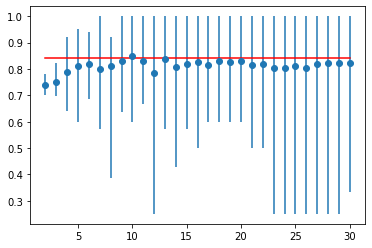

In [25]:
# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# create the dataset
def get_dataset(n_samples=100):
    X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y

# retrieve the model to be evaluate
def get_model():
    model = LogisticRegression()
    return model

# evaluate the model using a given test condition
def evaluate_model(cv):
# get the dataset
    X, y = get_dataset()
# get the model
    model = get_model()
# evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# return scores
    return mean(scores), scores.min(), scores.max()

# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
# define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
# evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
# report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
# store mean accuracy
    means.append(k_mean)
# store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

- Running the example first reports the LOOCV, then the mean, min, and max accuracy for each k value that was evaluated.

- The KFold class can be used directly in order to split up a dataset prior to modeling such that all models will use the same data splits. This is especially helpful if you are working with very large data samples. The use of the same splits across algorithms can have benefits for statistical tests that you may wish to perform on the data later.

>LogisticRegression: ideal=0.840, cv=0.850
>RidgeClassifier: ideal=0.830, cv=0.830
>SGDClassifier: ideal=0.810, cv=0.740
>PassiveAggressiveClassifier: ideal=0.730, cv=0.810
>KNeighborsClassifier: ideal=0.760, cv=0.770
>DecisionTreeClassifier: ideal=0.710, cv=0.670
>ExtraTreeClassifier: ideal=0.650, cv=0.630
>LinearSVC: ideal=0.820, cv=0.830
>SVC: ideal=0.900, cv=0.880
>GaussianNB: ideal=0.730, cv=0.720
>AdaBoostClassifier: ideal=0.740, cv=0.740
>BaggingClassifier: ideal=0.750, cv=0.730
>RandomForestClassifier: ideal=0.810, cv=0.770
>ExtraTreesClassifier: ideal=0.840, cv=0.790
>GaussianProcessClassifier: ideal=0.790, cv=0.760
>GradientBoostingClassifier: ideal=0.820, cv=0.810
>LinearDiscriminantAnalysis: ideal=0.830, cv=0.830
>QuadraticDiscriminantAnalysis: ideal=0.550, cv=0.690
Correlation: 0.810


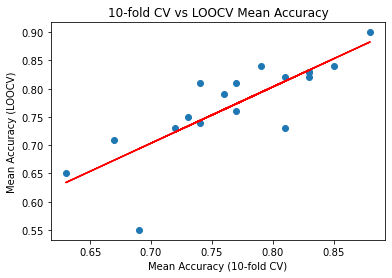

In [5]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
# create the dataset
def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
	# get the dataset
	X, y = get_dataset()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores)
 
# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
	# evaluate model using each test condition
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# store results
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# summarize progress
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

### Repeated k-fold cross-validation
https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

Repeated k-fold cross-validation replicates the procedure […] multiple times. For example, if 10-fold cross-validation was repeated five times, 50 different held-out sets would be used to estimate model efficacy.

num_repeated 1 mean=0.8680 standard_error=0.011
num_repeated 2 mean=0.8675 standard_error=0.008
num_repeated 3 mean=0.8673 standard_error=0.006
num_repeated 4 mean=0.8670 standard_error=0.006
num_repeated 5 mean=0.8658 standard_error=0.005
num_repeated 6 mean=0.8655 standard_error=0.004
num_repeated 7 mean=0.8651 standard_error=0.004
num_repeated 8 mean=0.8651 standard_error=0.004
num_repeated 9 mean=0.8656 standard_error=0.003
num_repeated 10 mean=0.8658 standard_error=0.003
num_repeated 11 mean=0.8655 standard_error=0.003
num_repeated 12 mean=0.8654 standard_error=0.003
num_repeated 13 mean=0.8652 standard_error=0.003
num_repeated 14 mean=0.8651 standard_error=0.003
num_repeated 15 mean=0.8653 standard_error=0.003


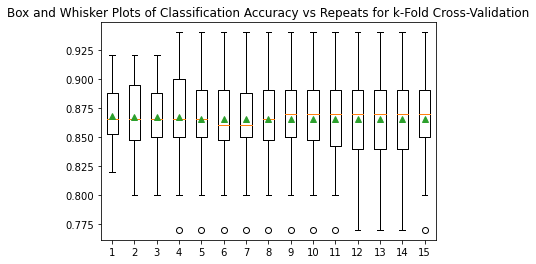

In [4]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('num_repeated %d mean=%.4f standard_error=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.title('Box and Whisker Plots of Classification Accuracy vs Repeats for k-Fold Cross-Validation')
pyplot.show()

1. Running the example reports the mean and standard error classification accuracy using 10-fold cross-validation with different numbers of repeats. 
2. Looking at the standard error, we can see that it decreases with an increase in the number of repeats and stabilizes with a value around 0.003 at around 9 or 10 repeats, although 5 repeats achieve a standard error of 0.005, half of that achieved with a single repeat.
3. A box and whisker plot is created to summarize the distribution of scores for each number of repeats. The orange line indicates the median of the distribution and the green triangle represents the arithmetic mean. If these symbols (values) coincide, it suggests a reasonable symmetric distribution and that the mean may capture the central tendency well. This might provide an additional heuristic for choosing an appropriate number of repeats for your test harness. 
  - Taking this into consideration, using five repeats with this chosen test harness and algorithm appears to be a good choice.